![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 8: Principal Component Analysis

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (05-03-2020)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-classical-data-analysis-2019/blob/master/08_DIM_REDUCTION/Session_8_Classical_Data_Analysis_PCA.ipynb)

**Resources (code patched and updated from):**
* Sklearn
* Aurelien Geron's O'Reilly's "Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow"

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Projection methods

UUID - #S8C1

Build 3D dataset:

In [0]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

# PCA

UUID - #S8C2


Saving figure pca_best_projection_plot


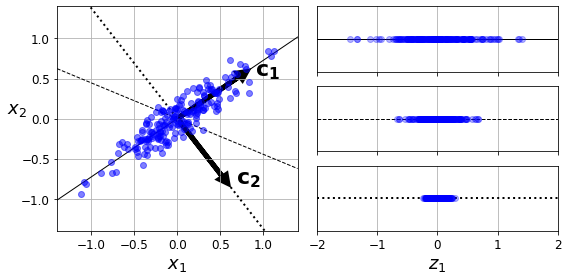

In [0]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("pca_best_projection_plot")
plt.show()

## PCA using SVD decomposition with numpy

UUID - #S8C3

### Rebuild the 3D Dataset

In [0]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

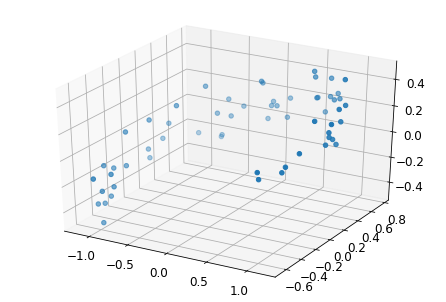

In [0]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

In [0]:
import numpy as np

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [0]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [0]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [0]:
i = Vt.T
i.shape

(3, 3)

In [0]:
Vt.T

array([[ 0.93636116, -0.34027485, -0.08626012],
       [ 0.29854881,  0.90119108, -0.31420255],
       [ 0.18465208,  0.2684542 ,  0.94542898]])

In [0]:
W2 = Vt.T[:, :2]
print(W2)
X2D = X_centered.dot(W2)

[[ 0.93636116 -0.34027485]
 [ 0.29854881  0.90119108]
 [ 0.18465208  0.2684542 ]]


In [0]:
X2D_using_svd = X2D

In [0]:
X2D_using_svd

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

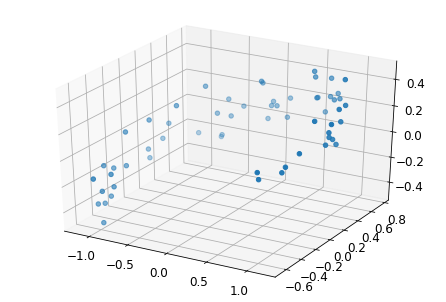

In [0]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

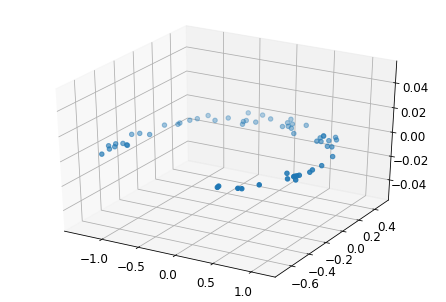

In [0]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X2D_using_svd[:, 0], X2D_using_svd[:, 1])
plt.show()

## PCA using Scikit-Learn

With Scikit-Learn, PCA is really trivial. It even takes care of mean centering for you:

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [0]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [0]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

Notice that running PCA multiple times on slightly different datasets may result in different results. In general the only difference is that some axes may be flipped. In this example, PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped:

In [0]:
np.allclose(X2D, -X2D_using_svd)

True

Recover the 3D points projected on the plane (PCA 2D subspace).

In [0]:
X3D_inv = pca.inverse_transform(X2D)

Of course, there was some loss of information during the projection step, so the recovered 3D points are not exactly equal to the original 3D points:

In [0]:
np.allclose(X3D_inv, X)

False

We can compute the reconstruction error:

In [0]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

The inverse transform in the SVD approach looks like this:

In [0]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

The reconstructions from both methods are not identical because Scikit-Learn's `PCA` class automatically takes care of reversing the mean centering, but if we subtract the mean, we get the same reconstruction:

In [0]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

The `PCA` object gives access to the principal components that it computed:

In [0]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

Select individual components

In [0]:
pca.components_.T[:, 0]

array([-0.93636116, -0.29854881, -0.18465208])

Compare to the first two principal components computed using the SVD method:

In [0]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

Notice how the axes are flipped.

Now let's look at the explained variance ratio:

In [0]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

The first dimension explains 84.2% of the variance, while the second explains 14.6%.

By projecting down to 2D, we lost about 1.1% of the variance:

In [0]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

Here is how to compute the explained variance ratio using the SVD approach (recall that `s` is the diagonal of the matrix `S`):

In [0]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

Next, let's generate some nice figures! :)

Utility class to draw 3D arrows (copied from http://stackoverflow.com/questions/11140163)

In [0]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

Express the plane as a function of x and y.

In [0]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

Plot the 3D dataset, the plane and the projections on that plane.

Saving figure dataset_3d_plot


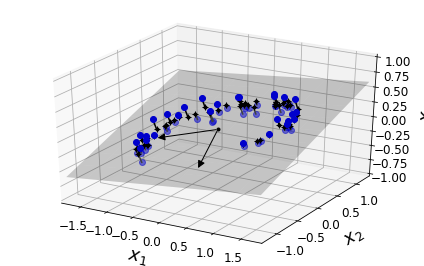

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

# Note: If you are using Matplotlib 3.0.0, it has a bug and does not
# display 3D graphs properly.
# See https://github.com/matplotlib/matplotlib/issues/12239
# You should upgrade to a later version. If you cannot, then you can
# use the following workaround before displaying each 3D graph:
# for spine in ax.spines.values():
#     spine.set_visible(False)

save_fig("dataset_3d_plot")
plt.show()

Saving figure dataset_2d_plot


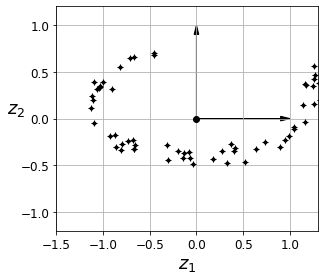

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
save_fig("dataset_2d_plot")

### EXERCISE 1: PCA's Sklearn and uncorrelated data [Optional]

First we will give an easy example of how to perform PCA and plot the eigenvectors or principal components

UUID - #S8E1

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [0]:
np.random.seed(1)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

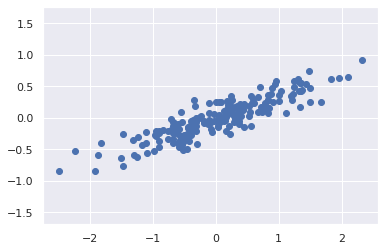

In [0]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [0]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


This code will plot the principal component vectors proportional to the sqrt of the explained variance. 

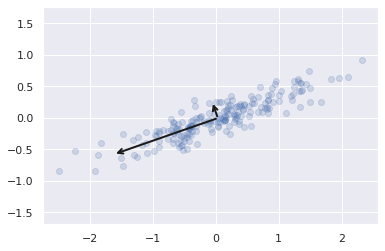

In [0]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Now try to perform a PCA over an uncorrelated dataset. Let us generate points within a circle, you can generate random angles between $0$ and $2\pi$ and random radius between $0$ and $R$. Then generate x and y coordinates as:

$$ x = R\ cos(\alpha)$$
$$ y = R\ sin(\alpha)$$

Generate 200 points.

In [0]:
import math
np.random.seed(0)
X = np.zeros((200, 2))
R = 1
a = np.random.rand(200) * 2 * np.pi
r = np.random.rand(200)*R
X[:, 0] = np.cos(a) * r
X[:, 1] = np.sin(a) * r

Make a scatter plot of the generated data, would it be a good idea to perform a PCA on this dataset? Why? Remember that PCA tries to learn relations between variables

In [0]:
plt.scatter...

Perform a PCA to the data, again with 2 components. Print the components and the explained variance. What can you tell about the results?

In [0]:
from sklearn.decomposition import PCA


Plot again the data with the principal components

In [0]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
...

### Finding the right number of dimensions

UUID - #S8C4



### MNIST dataset

In [0]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [0]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Using argmax

In [0]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [0]:
d

154

Using a graph searching for the elbow

Saving figure explained_variance_plot


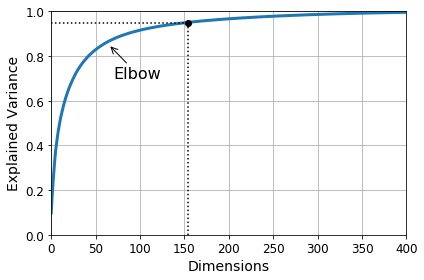

In [0]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

#### Setting n_components to 0.95

In [0]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [0]:
pca.n_components_

784

In [0]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557437

## PCA for compression

UUID - #S8C5

In [0]:
# Placing the number of components discovered before
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

### Utils: plot MNIST digits function

In [0]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure mnist_compression_plot


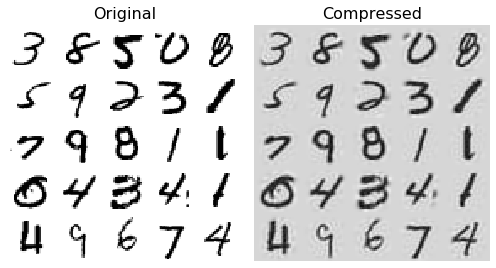

In [0]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

In [0]:
X_reduced_pca = X_reduced

## PCA as feature selector

PCA can be used as a feature selector for datasets which have a large amount of features, possibly correlated. Images is an example where this happens often. Here we will take a look and explore a bit into that. We will be using the Labeled Faces in the Wild dataset made available through Scikit-Learn.

UUID - #S8C6

In [0]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

Print the target names

In [0]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


Print the shape of the images, how many dimensions does each example have?

In [0]:
print(faces.images.shape)

(1348, 62, 47)


In [0]:
print(f'Num dimensions {62 * 47}')

Num dimensions 2914


Print the dataset description

In [0]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

Print the shape of the data. Is this in accordance with the shape of the images?

In [0]:
print(faces.data.shape)

(1348, 2914)


Create a subplot with 3 rows and 5 columns, each plot should be an image that can be plotted with `axis.imshow()` and the title of the plots should be the target name.

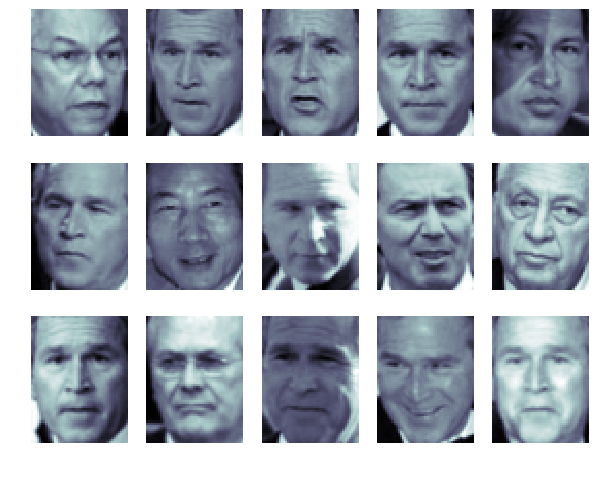

In [0]:
fig, ax = plt.subplots(3, 5, figsize=(10,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xlabel=faces.target_names[faces.target[i]])
    axi.axis('off')

### The svd_solver parameter

UUID - #S8C7

Let's take a look at the principal axes that span this dataset. Because this is a large dataset, we will use PCA with the `svd_solver=randomized`. It will use a randomized method to approximate the first $N$ principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). Generate a PCA estimator with 150 components and fit it to the data. Use the library `time` to compute the number of seconds it needs to generate the 150 components and print the principal components.

In [0]:
import time

t_start = time.time()
pca = PCA(200, svd_solver='randomized')
pca.fit(faces.data)
print(f'Finished with randmomized svd method in {time.time() - t_start} seconds')
pca.components_[:, 0]

Finished with randmomized svd method in 0.30793237686157227 seconds


array([-5.79719339e-03,  1.70835517e-02, -1.83366500e-02, -3.42531987e-02,
        8.62252805e-03, -7.24142417e-03, -1.85060892e-02,  1.51030105e-02,
       -4.02943790e-02, -5.38232317e-03, -1.54135292e-02, -7.42049813e-02,
       -2.84908414e-02,  8.41130782e-03, -2.31274944e-02,  1.43337902e-02,
        4.59712595e-02, -6.92077074e-03, -3.40742208e-02,  1.28034605e-02,
        3.71140689e-02,  6.70121517e-03, -8.39411467e-03,  2.80349590e-02,
        4.01637703e-02, -2.20988132e-02,  1.33668967e-02,  1.66212972e-02,
       -1.18478676e-02, -4.46537696e-02,  7.08269436e-05, -6.09878451e-03,
        2.75516976e-02, -2.02358654e-03, -4.41416353e-03, -2.42002830e-02,
        2.71757003e-02,  3.21213268e-02, -4.41383990e-03,  1.84099600e-02,
        1.79704241e-02,  3.07724755e-02, -6.89048087e-03, -1.76001005e-02,
        3.49927619e-02,  4.22254354e-02, -2.79720761e-02,  7.98381167e-04,
        3.02312542e-02, -1.87079292e-02, -1.68810580e-02,  6.37064651e-02,
        1.86776482e-02, -

Now use the full svd method. Also print the components and compare them with the previous ones. Are the results compatible?

In [0]:
t_start = time.time()
pca = PCA(150, svd_solver='full')
pca.fit(faces.data)
print(f'Finished with full svd method in {time.time() - t_start} seconds')
pca.components_[:, 0]

Finished with full svd method in 1.327500581741333 seconds


array([-5.79724880e-03,  1.70835331e-02, -1.83367282e-02, -3.42530683e-02,
        8.62248614e-03, -7.24099390e-03, -1.85061283e-02,  1.51027646e-02,
       -4.02937233e-02, -5.38368011e-03, -1.54140815e-02, -7.42045939e-02,
       -2.84912158e-02,  8.41081329e-03, -2.31276974e-02,  1.43335378e-02,
        4.59710173e-02, -6.92123920e-03, -3.40744480e-02,  1.28024770e-02,
        3.71144824e-02,  6.70135813e-03, -8.39397404e-03,  2.80340519e-02,
        4.01638560e-02, -2.20977329e-02,  1.33674769e-02,  1.66216902e-02,
       -1.18482821e-02, -4.46545631e-02,  7.00716773e-05, -6.09863410e-03,
        2.75506284e-02, -2.02298001e-03, -4.41415375e-03, -2.42003389e-02,
        2.71753315e-02,  3.21203358e-02, -4.41408576e-03,  1.84100550e-02,
        1.79705303e-02,  3.07725519e-02, -6.88768411e-03, -1.75980385e-02,
        3.49956229e-02,  4.22224626e-02, -2.79724989e-02,  7.98278197e-04,
        3.02291065e-02, -1.87067930e-02, -1.68792475e-02,  6.37092143e-02,
        1.86766088e-02, -

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces"). Generate a subplot with 3 rows and 8 columns, might be better for visualization to set `figsize=(16, 8)`. For each subplot, show the image corresponding to the the ith principal component, reshaped to have the same dimensions as the input images.

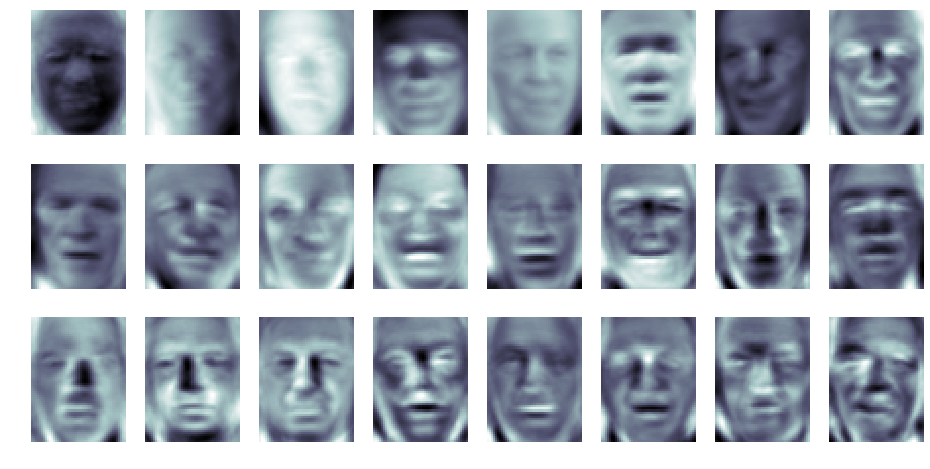

In [0]:
fig, axes = plt.subplots(3, 8, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap='bone')
    ax.axis('off')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving. You may compute the cumulative sum of the `explained_variance_ratio_` with `np.cumsum`. Make a plot of the curve. Do you think 150 components is enough? What do you think that might be a good criteria to stop? You may try to repeat the plot increasing the number of components.

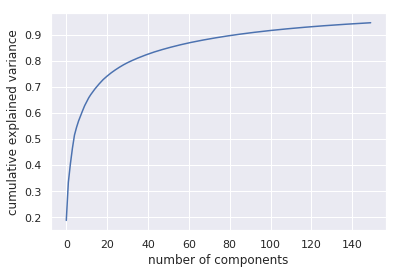

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## EXERCISE 2: compression and feature selection of MNIST data

UUID - #S8E2

Following the examples above do a PCA over MNIST dataset following these rules:

* First try randomized and find the appropiate number of dimensions
* Once you have that, run a PCA with the full SVD mode
* Compress the dataset and reconstruct it
* Show the eigenvectors or the features for the MNIST dataset

## Incremental PCA

UUID - #S8C8

In [0]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") 
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [0]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

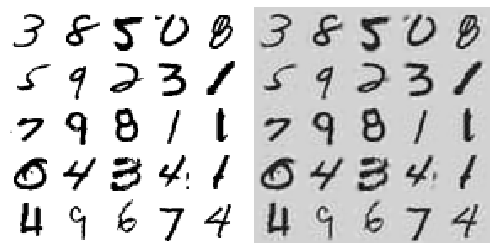

In [0]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [0]:
X_reduced_inc_pca = X_reduced

Let's compare the results of transforming MNIST using regular PCA and incremental PCA. First, the means are equal: 

In [0]:
np.allclose(pca.mean_, inc_pca.mean_)

NameError: ignored

But the results are not exactly identical. Incremental PCA gives a very good approximate solution, but it's not perfect:

In [0]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

# EXERCISE 3: the limits of PCA

UUID - #S8E3

Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

The MNIST dataset was loaded earlier.

In [0]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

*Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.*

*Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.*

*Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?*

*Next evaluate the classifier on the test set: how does it compare to the previous classifier?*

0.9009

*Now try Logistic Regression over the original and the compressed dataset. Is it faster to train? What about the performance?*

# Manifold Learning

## Kernel PCA

UUID - #S8C9

In [0]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [0]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

Saving figure kernel_pca_plot


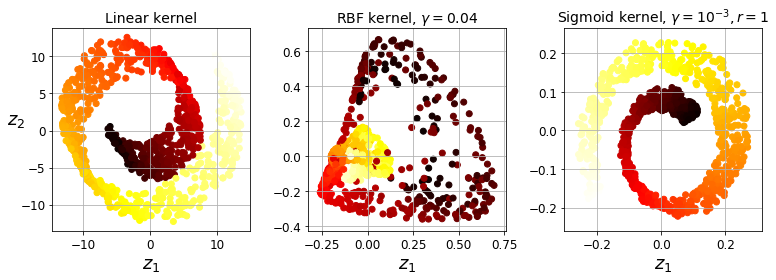

In [6]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("kernel_pca_plot")
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [36]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [0]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

### Plotting the reduced dimensionality image

[]

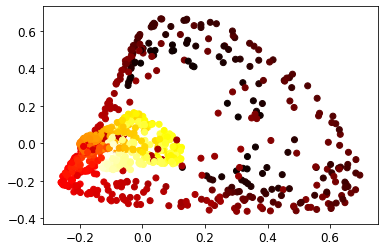

In [37]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.plot()

### Plotting the preimage

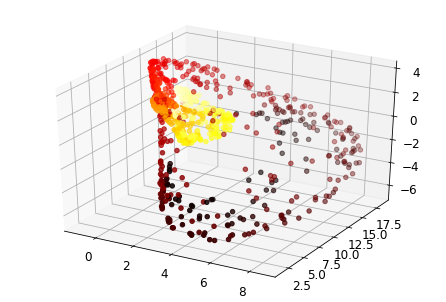

In [44]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_preimage[:, 0], X_preimage[:, 1], X_preimage[:, 2],c=t, cmap=plt.cm.hot)
plt.show()

## LLE

UUID - #S8C10

In [0]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [0]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

Saving figure lle_unrolling_plot


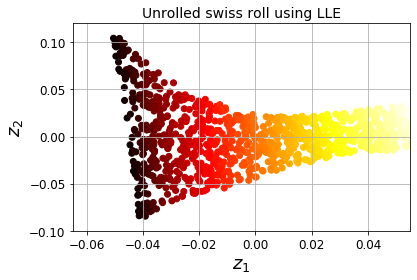

In [47]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

# Other dimensionality reduction techniques

UUID - #S8C11

In [0]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [0]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [0]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

Saving figure other_dim_reduction_plot


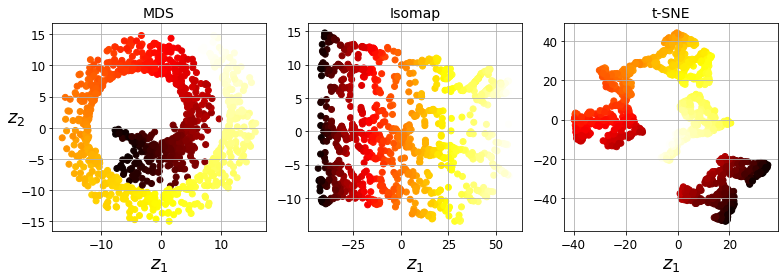

In [55]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("other_dim_reduction_plot")
plt.show()

# EXERCISE 4: using manifold to fix the previous exercise [optional]

Use a Manifold approach in order to make Random Forest train faster. Is dimensionality reduction always a viable option?

# EXERCISE 5: MNIST with MANIFOLD [optional]

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. 

Try using other dimensionality reduction
algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

# EXERCISE 6: real world dimensionality reduction problem

Go to the teams folder of the day and you will find there a drone image that I took over Iceland during the winter of 2016. Try to load the image with your preferred library (beware of the size), so you should consider either crop it previously or use some technique for dimensionality reduction that allows for sequential memory use. 

Try to perfom dimensionality reduction over the image, and plot the features represented by the eigenvectors. What are the main principal components of the image? Will this image be useful to classify the algae in the sea? Measure the reduction in size of the dataset. 

This very same dataset will be used later on for unsupervised classification.